#### Now let's assess the quality of data

In [2]:
import pandas as pd
from functools import reduce
import xlsxwriter
import pprint
import klib
from pandas_profiling import ProfileReport #cool package to describe a dataset

In [ ]:
import os
os.getcwd()
folder = '/Users/anshulsaxena/MicroSave/cohort 3/contingency plan/Data Sources/wip'
os.chdir(folder)

In [ ]:

file_name = input("Please enter the file you wish to analyze") 
#file_name = 'World Bank data 7 July MSC R4 countries.xlsx' # This file has been taken from the World Bank site
read_sheet = input(f"Enter the sheet name to be read from the workbook {file_name}: ")

path = folder+'/'+file_name

df_for_analysis = pd.read_excel(path, sheet_name=read_sheet)
df_for_analysis = df_for_analysis[df_for_analysis.year>2014]
#df_for_analysis.head()


In [5]:
df_for_analysis.head()
#Let's try klib
klib.missingval_plot(df_for_analysis)
profile = ProfileReport(df_for_analysis)
profile.to_file(path+"1.html") #make this dynamic

No missing values found in the dataset.


In [6]:
df_for_analysis_cleaned = klib.data_cleaning(df_for_analysis)

- Long column names detected (>25 characters)! Consider renaming the following columns ['rank_enforcing_contracts_1=most_business_friendly_regulations', 'enforcing_contracts_time_days', 'global_ease_of_doing_business_score_db10_14_methodology', 'rank_ease_of_doing_business_index_1=most_business_friendly_regulations', 'rank_getting_credit_1=most_business_friendly_regulations', 'starting_a_business_cost__women_percent_of_income_per_capita', 'starting_a_business_cost__women_percent_of_income_per_capita__score', 'starting_a_business_cost__men_percent_of_income_per_capita', 'starting_a_business_cost__men_percent_of_income_per_capita__score', 'starting_a_business_paid_in_minimum_capital_percent_of_income_per_capita__score', 'starting_a_business_time__women_days', 'starting_a_business_time__women_days__score', 'starting_a_business_time__men_days', 'starting_a_business_time__men_days__score', 'starting_a_business_minimum_capital_percent_of_income_per_capita', 'starting_a_business_procedures_re

In [7]:
df_for_analysis_cleaned.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 52 to 129
Data columns (total 29 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   country                                                                          78 non-null     string 
 1   year                                                                             78 non-null     int16  
 2   rank_enforcing_contracts_1=most_business_friendly_regulations                    78 non-null     object 
 3   rank_ease_of_doing_business_index_1=most_business_friendly_regulations           78 non-null     object 
 4   rank_getting_credit_1=most_business_friendly_regulations                         78 non-null     object 
 5   starting_a_business_cost__women_percent_of_income_per_capita                     78 non-null     float32
 6   starting_a

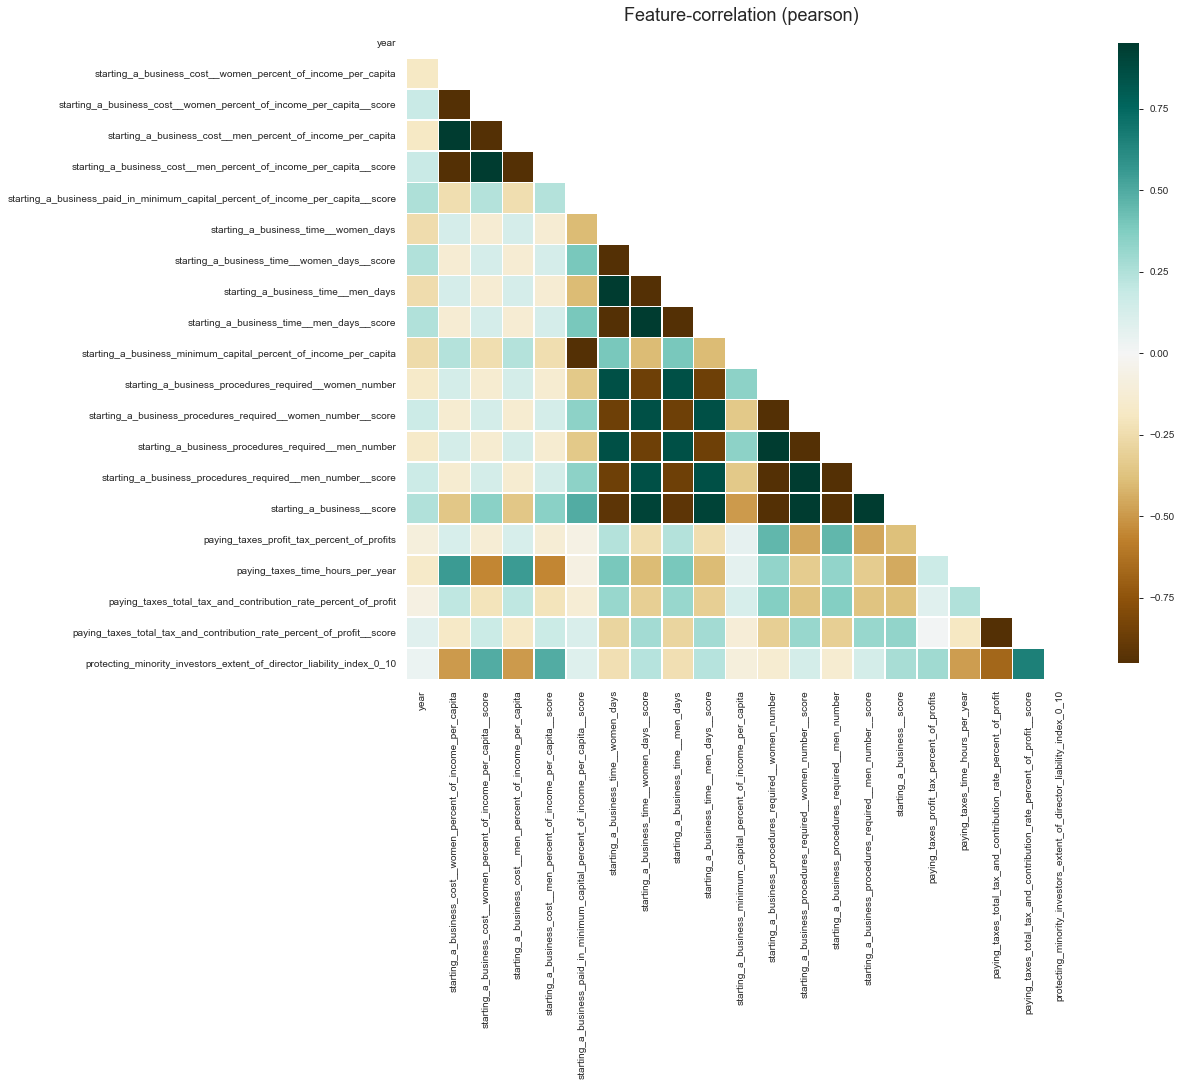

In [8]:
klib.corr_plot(df_for_analysis_cleaned, annot=False, figsize=(15,12))
#klib.corr_plot(df_for_profiling_cleaned, split='pos', annot=False, figsize=(15,12))
#klib.corr_plot(df_for_profiling_cleaned, split='neg', annot=False, figsize=(15,12))

In [9]:
df_for_analysis_cleaned.head()
#df_for_analysis_cleaned[df_for_analysis_cleaned.country=='India']


,country,year,rank_enforcing_contracts_1=most_business_friendly_regulations,rank_ease_of_doing_business_index_1=most_business_friendly_regulations,rank_getting_credit_1=most_business_friendly_regulations,starting_a_business_cost__women_percent_of_income_per_capita,starting_a_business_cost__women_percent_of_income_per_capita__score,starting_a_business_cost__men_percent_of_income_per_capita,starting_a_business_cost__men_percent_of_income_per_capita__score,starting_a_business_paid_in_minimum_capital_percent_of_income_per_capita__score,...,starting_a_business__score,rank_starting_a_business_1=most_business_friendly_regulations,paying_taxes_profit_tax_percent_of_profits,rank_paying_taxes_1=most_business_friendly_regulations,paying_taxes_time_hours_per_year,paying_taxes_total_tax_and_contribution_rate_percent_of_profit,paying_taxes_total_tax_and_contribution_rate_percent_of_profit__score,protecting_minority_investors_extent_of_director_liability_index_0_10,rank_protecting_minority_investors_1=most_business_friendly_regulations,rank_resolving_insolvency_1=most_business_friendly_regulations
52,Bangladesh,2015,..,..,..,16.799999,91.576172,16.799999,91.576172,100.000000,...,81.355469,..,31.600000,..,422.000000,35.400002,86.879311,7.0,..,..
53,Côte d'Ivoire,2015,..,..,..,20.000000,90.018379,20.000000,90.018379,99.139519,...,89.773949,..,8.800000,..,272.000000,51.900002,62.357021,1.0,..,..
54,India,2015,..,..,..,16.400000,91.792213,16.400000,91.792213,72.199203,...,61.829510,..,23.400000,..,252.880005,55.500000,56.677410,6.0,..,..
55,Indonesia,2015,..,..,..,21.200001,89.393211,21.200001,89.393211,91.125381,...,64.055450,..,19.700001,..,253.000000,31.400000,92.567146,5.0,..,..
56,Senegal,2015,..,..,..,63.799999,68.107407,63.799999,68.107407,95.239197,...,85.042976,..,16.200001,..,620.000000,45.099998,72.749748,1.0,..,..


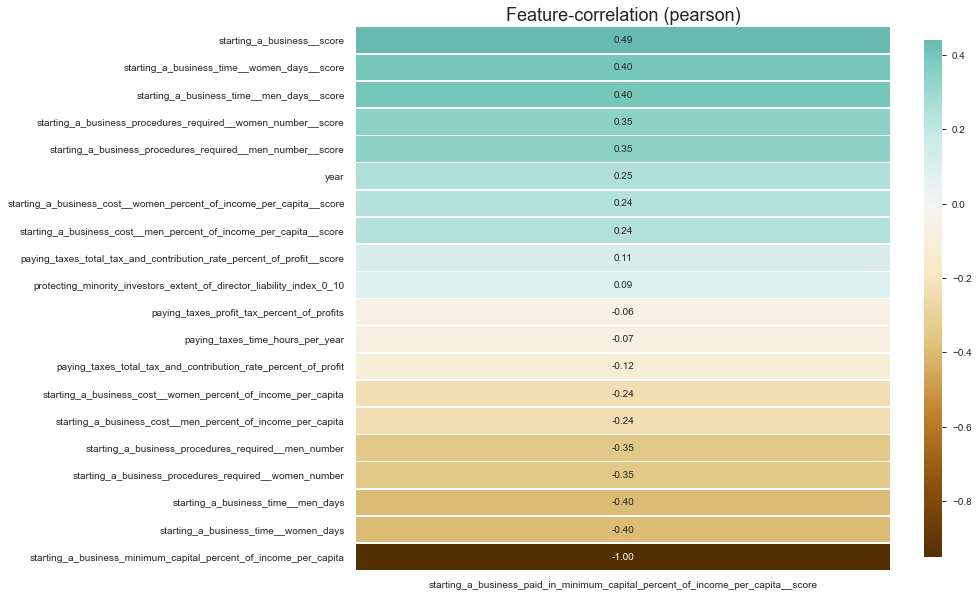

In [10]:
klib.corr_plot(data=df_for_analysis_cleaned, annot=True\
              , target='starting_a_business_paid_in_minimum_capital_percent_of_income_per_capita__score')
#klib.corr_plot(data=df_for_analysis_cleaned[df_for_analysis_cleaned.country.isin(['India','United States'])], annot=True\
#              , target='starting_a_business_paid_in_minimum_capital_percent_of_income_per_capita__score')

In [30]:
#df_for_analysis_cleaned.corr()

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

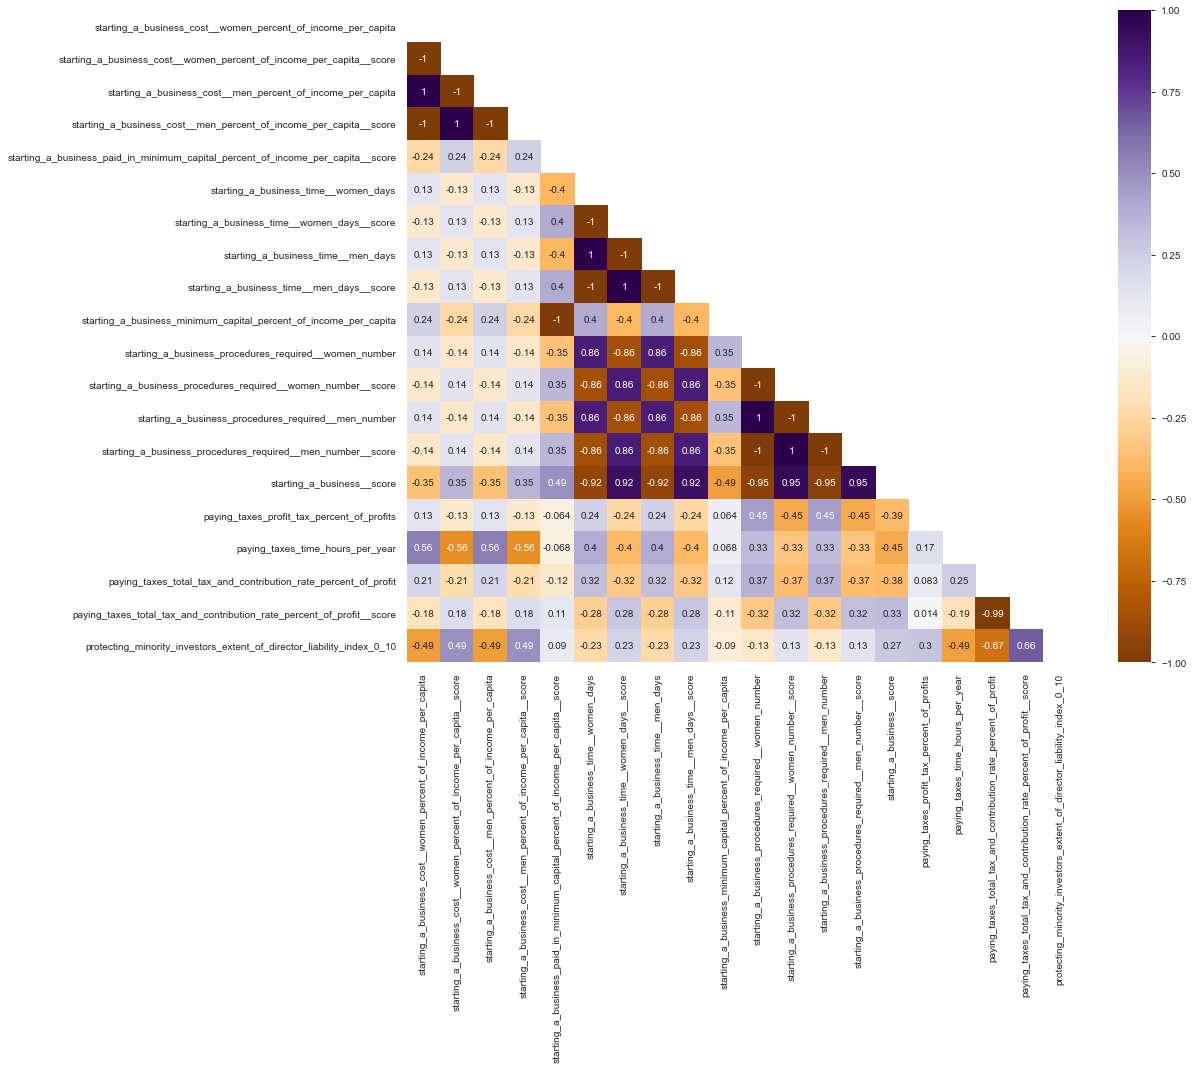

In [46]:
df_for_corr_matrix = df_for_analysis_cleaned.drop(columns='year') # year values could have distorted the corr matrix, so let's remove it
corr_matrix = df_for_corr_matrix.corr()
# NOTE: We don't need to normalize the values in this case as there is no particular outlier column wrt values

# we want to show only bottom half of correlation matrix as the upper half is redundant to it
mask = np.zeros(corr_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True 

fig, ax = plt.subplots(figsize=(15,12))         # Sample figsize in inches

sn.heatmap(data=corr_matrix, annot=True, cmap='PuOr',ax=ax, mask=mask)
plt.show()
